In [5]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

catalog = pd.read_csv('final_product_catalog.csv')
catalog.head(20)

,product_id,manufacturer_id,attribute_1,attribute_2,attribute_3,attribute_4,attribute_5,categories,parent_categories
0,0,389,4,2,469,0,-1,[],[]
1,1,1006,4,0,487,3,66,"[2459.0, 274.0, 4124.0]","[3027.0, 2920.0, 3898.0]"
2,2,464,4,1,484,0,66,[],[]
3,3,389,8,1,529,0,39,"[807.0, 3403.0]","[2346.0, 310.0]"
4,4,1291,4,0,457,0,-1,"[281.0, 1114.0, 3800.0]","[2006.0, 1061.0, 3089.0]"
5,5,389,4,2,471,0,-1,[],[]
6,6,1496,10,0,51,0,127,"[2969.0, 327.0, 2897.0, 3413.0, 4027.0, 3920.0...","[918.0, 1178.0, 910.0, 3162.0, 3898.0, 3898.0,..."
7,7,105,6,1,495,3,146,[],[]
8,8,1048,4,0,28,0,175,"[813.0, 3949.0]","[2012.0, 3898.0]"
9,9,1065,4,1,291,3,175,"[30.0, 1060.0, 3268.0, 2104.0, 3937.0]","[1682.0, 1565.0, 1557.0, 3819.0, 3898.0]"


In [10]:
transactions = pd.read_csv('transactions.csv')
print(len(transactions))

1071538


             attribute_1  attribute_2  attribute_3  attribute_4  attribute_5
attribute_1     1.000000    -0.000350     0.136970     0.008795     0.049549
attribute_2    -0.000350     1.000000     0.080420    -0.062744    -0.017626
attribute_3     0.136970     0.080420     1.000000    -0.092444    -0.000903
attribute_4     0.008795    -0.062744    -0.092444     1.000000     0.110246
attribute_5     0.049549    -0.017626    -0.000903     0.110246     1.000000


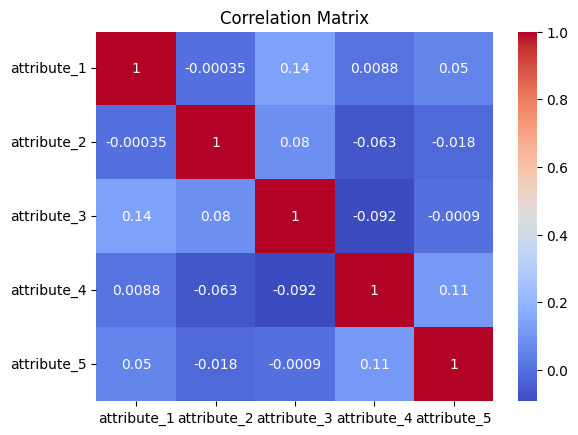

In [6]:
# Sayısal özellikler için korelasyon matrisi
numerical_features = ['attribute_1', 'attribute_2', 'attribute_3', 'attribute_4', 'attribute_5']
correlation_matrix = catalog[numerical_features].corr()
print(correlation_matrix)

sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()

num_parent_categories
2     6835
0     6788
1     6521
3     4469
4     2712
5     1704
6     1206
7      874
8      565
9      319
10     251
11     173
12     113
13      82
14      54
16      29
15      27
17      14
18       8
19       7
21       6
20       6
22       4
23       2
24       2
33       2
25       1
35       1
29       1
Name: count, dtype: int64


AttributeError: Rectangle.set() got an unexpected keyword argument 'bin'

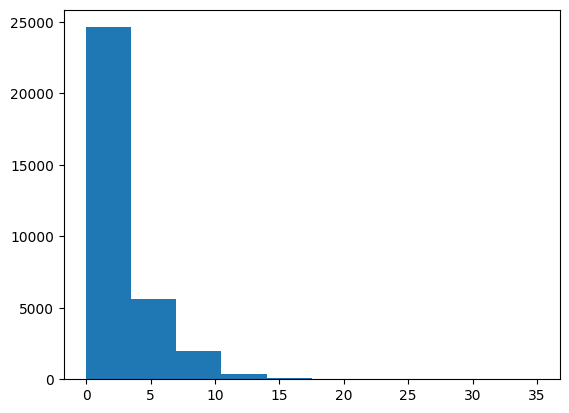

In [9]:
# Her ürünün ait olduğu üst kategori sayısını hesaplama
catalog['num_parent_categories'] = catalog['parent_categories'].apply(lambda x: len(eval(x)) if x else 0)
print(catalog['num_parent_categories'].value_counts())
plt.hist(catalog['num_parent_categories'], bin= 30, normed=True)
